# Import

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
import xlrd
import pingouin as pg
import seaborn as sns

# Data

In [6]:
satelit_data=(r'..\data\AgERA5_4params_graz.csv')
local_data=(r'..\data\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')
traffic_data=(r'..\data\traffic.xlsx')
df_satelit= pd.read_csv(satelit_data,index_col = 0)
df_local = pd.read_csv(local_data,index_col = 0)
df_local.index = pd.to_datetime(df_local.index)
df_satelit.index = pd.to_datetime(df_satelit.index)
df_ulice = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='street', index_col=0)
df_ulice_podaci = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='traffic_data', index_col=0)
df_ulice_podaci.index = pd.to_datetime(df_ulice_podaci.index)
df_local=df_local['2018-01-01':'2020-03-15']
df_ulice_podaci=df_ulice_podaci['2018-01-01':'2020-03-15']
df_satelit=df_satelit['2018-01-01':'2020-03-15']

# Nan

In [7]:
print(df_ulice_podaci.isnull().sum())

# popunjavnaje nan vrijednosti s mean za svaku kolonu

df_ulice_podaci = df_ulice_podaci.fillna(df_ulice_podaci.mean())

8010_208      2
8020_110      2
8020_119      3
8020_122      2
8053_111      2
8010_205      2
8010_209      2
8010_213      2
8010_214      2
8020_102      5
8020_103      2
8020_107     45
8041_218      2
8041_221      2
8045_203    155
8051_101      2
dtype: int64


# Odjavjanje prometa za svaku mjernu tocku

In [8]:
Postaje=df_ulice.Reference_station
Udaljenost = df_ulice['Distance to ref']

In [9]:
Nord= []
DonBosco=[]
Sud= []
West= []
Ost= []
Postaje=df_ulice.Reference_station
mjerne_tocke = ['Nord','DonBosco','Sud','West','Ost']
for value,index,udaljenost in zip(Postaje,Postaje.index,Udaljenost):
    if value == 'Nord':
        Nord.append(index)
    if value == 'DonBosco':
        DonBosco.append(index)
    if value == 'Sud':
        Sud.append(index)
    if value == 'West':
        West.append(index)
    if value == 'Ost':
        Ost.append(index)
        
dictonary = {'Nord':Nord,'DonBosco':DonBosco,'Sud':Sud,'West':West,'Ost':Ost}

In [10]:
N_NO2=['N_NO2','D_NO2','S_NO2','W_NO2','O_NO2']

In [11]:
strings = ['N_','D_','S_','W_','O_']

['8010_205', '8020_102', '8045_203', '8051_101']
['8020_110', '8020_119', '8020_122', '8053_111']
['8020_107', '8041_218']
['8020_103']
['8010_208', '8010_209', '8010_213', '8010_214', '8041_221']


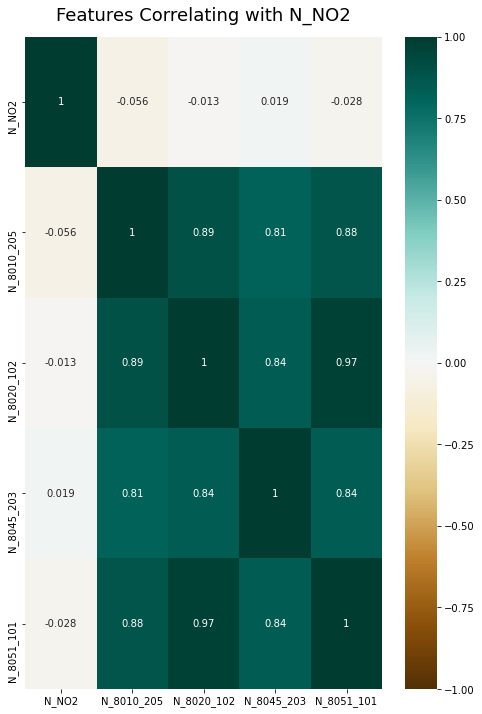

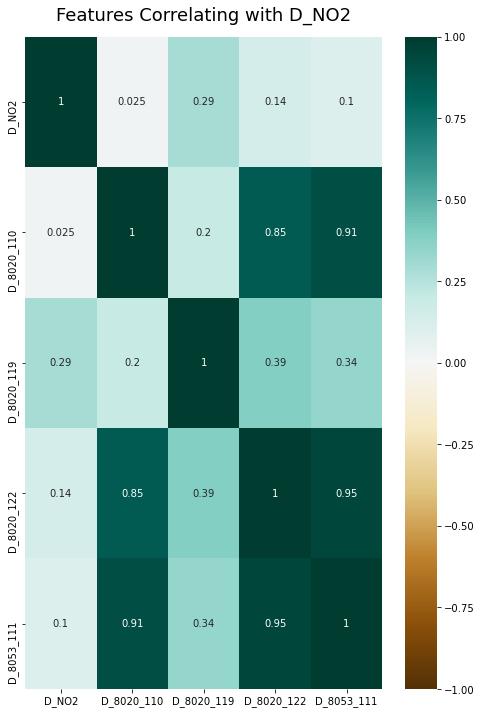

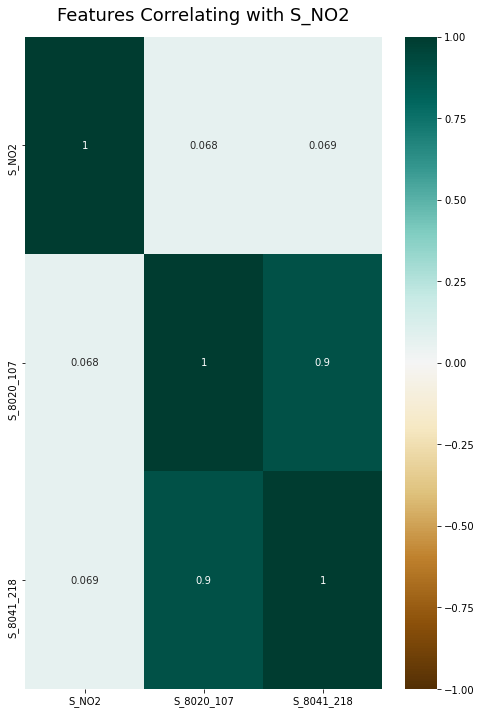

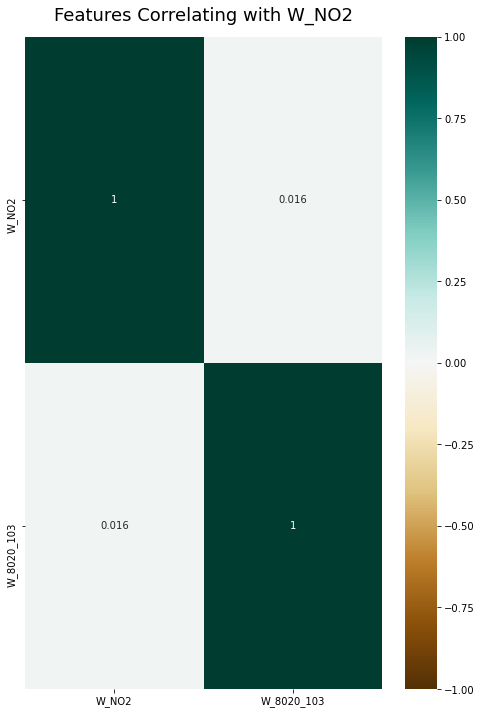

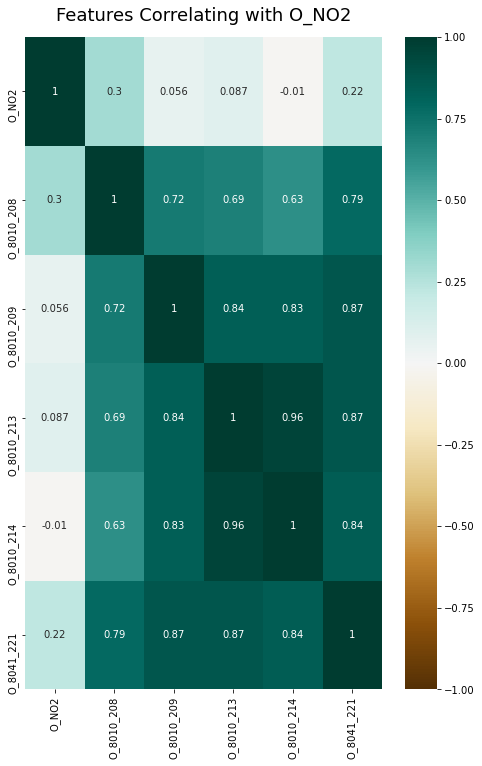

In [46]:
for NO2,value,string in zip(N_NO2,dictonary.values(),strings):
    print(value)
    x = df_local[NO2]
    y = df_ulice_podaci[value]
    data = pd.concat([x, y],axis = 1, join='inner')
    plt.figure(figsize=(8, 12))
    my_new_list = [string + x for x in value]
    ma_new_list = my_new_list.insert(0,NO2)
    heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',xticklabels=my_new_list, yticklabels=my_new_list,)
    heatmap.set_title(f'Features Correlating with {NO2}', fontdict={'fontsize':18}, pad=16);        


# Koorelacija Pearson

In [17]:
print('Korelacija Pearson za Nord i promet')
for i in Nord:
    x = df_local.N_NO2
    y = df_ulice_podaci [i] 
    print(i,'\n')
    print(pg.corr(x,y),'\n') 

Korelacija Pearson za Nord i promet
8010_205 

           n         r          CI95%     p-val   BF10     power
pearson  805 -0.056487  [-0.13, 0.01]  0.109275  0.159  0.360448 

8020_102 

           n         r          CI95%     p-val   BF10     power
pearson  805 -0.012741  [-0.08, 0.06]  0.718149  0.047  0.065039 

8045_203 

           n        r          CI95%     p-val   BF10     power
pearson  805  0.01879  [-0.05, 0.09]  0.594488  0.051  0.083042 

8051_101 

           n         r         CI95%     p-val   BF10     power
pearson  805 -0.028109  [-0.1, 0.04]  0.425768  0.061  0.125255 



In [18]:
print('Korelacija Pearson za Don Bosco i promet')  
for i in DonBosco:
    x = df_local.D_NO2
    y = df_ulice_podaci [i]
    print(i,'\n')
    print(pg.corr(x,y),'\n')  


Korelacija Pearson za Don Bosco i promet
8020_110 

           n         r          CI95%     p-val   BF10     power
pearson  805  0.025469  [-0.04, 0.09]  0.470527  0.057  0.111471 

8020_119 

           n         r         CI95%         p-val       BF10  power
pearson  805  0.290282  [0.23, 0.35]  4.283826e-17  9.039e+13    1.0 

8020_122 

           n         r         CI95%     p-val     BF10     power
pearson  805  0.140145  [0.07, 0.21]  0.000066  124.522  0.979199 

8053_111 

           n         r         CI95%    p-val   BF10     power
pearson  805  0.104262  [0.04, 0.17]  0.00306  3.517  0.842585 



In [19]:
print('Korelacija Pearson za West i promet')  
for i in West:
    x = df_local.W_NO2
    y = df_ulice_podaci [i]
    print(i,'\n')
    print(pg.corr(x,y),'\n')  

Korelacija Pearson za West i promet
8020_103 

           n         r          CI95%     p-val   BF10     power
pearson  805  0.016473  [-0.05, 0.09]  0.640719  0.049  0.075294 



In [22]:
print('Korelacija Pearson za Ost i promet')  
for i in Ost:
    x = df_local.O_NO2
    y = df_ulice_podaci [i]
    print(i,'\n')
    print(pg.corr(x,y),'\n')  

Korelacija Pearson za Ost i promet
8010_208 

           n         r         CI95%         p-val       BF10  power
pearson  805  0.299588  [0.24, 0.36]  3.715873e-18  1.005e+15    1.0 

8010_209 

           n         r          CI95%     p-val   BF10     power
pearson  805  0.056145  [-0.01, 0.12]  0.111442  0.156  0.356821 

8010_213 

           n         r         CI95%     p-val   BF10    power
pearson  805  0.086548  [0.02, 0.15]  0.014035  0.897  0.69095 

8010_214 

           n        r          CI95%     p-val   BF10    power
pearson  805 -0.00998  [-0.08, 0.06]  0.777391  0.046  0.05919 

8041_221 

           n         r         CI95%         p-val       BF10     power
pearson  805  0.221992  [0.16, 0.29]  1.911326e-10  2.723e+07  0.999995 



In [21]:


print('Korelacija Pearson za Sud i promet')  
for i in Sud:
    x = df_local.S_NO2
    y = df_ulice_podaci [i]
    print(i,'\n')
    print(pg.corr(x,y),'\n')  



Korelacija Pearson za Sud i promet
8020_107 

           n         r         CI95%     p-val   BF10     power
pearson  805  0.068261  [-0.0, 0.14]  0.052868  0.287  0.490959 

8041_218 

           n        r        CI95%     p-val   BF10     power
pearson  805  0.06948  [0.0, 0.14]  0.048766  0.307  0.504788 

